Bitcoin *Predict*

Get Data

In [ ]:
#Import

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', parse_dates=["Date"],
                 index_col=["Date"]) #programa bunun date olduğunu söylüyoruz.




In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-01-12 03:02:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-01-12 03:02:02 (4.92 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’ saved [178509/178509]



In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df) #kaç tane veri var bakalım.

2787

In [ ]:
8*365 #8 yılın verisi var

2920

In [ ]:
#Her günün sonunda kapanan fiyatları başka bir yerde toplayalım.


bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


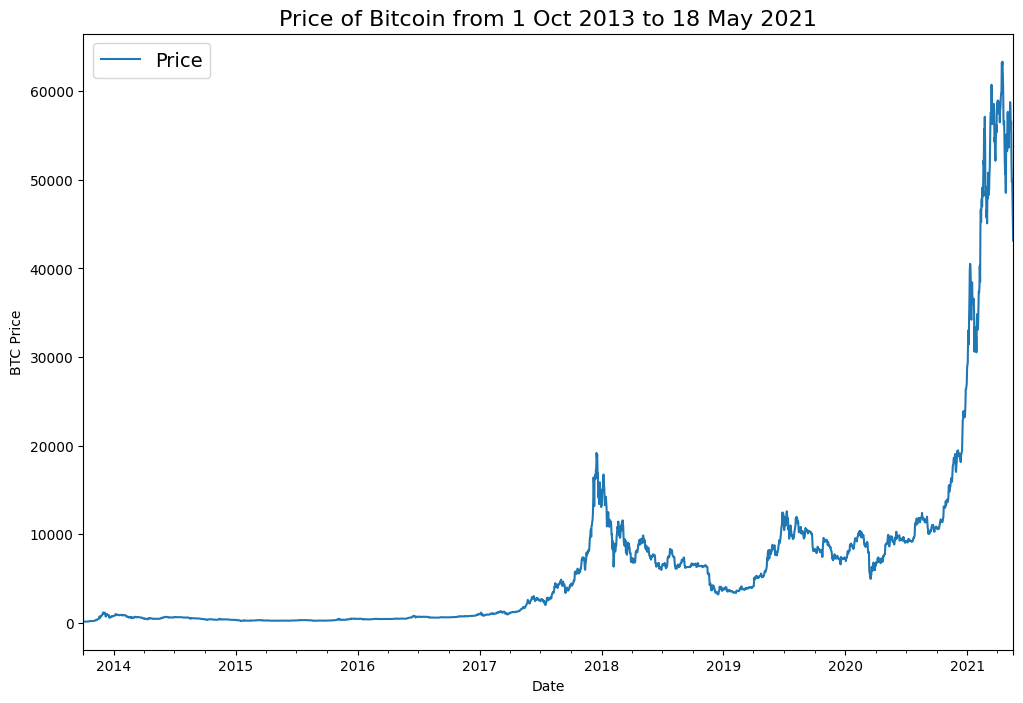

In [ ]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(12, 8))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
# CSV Module



In [ ]:
#Importing and formatting

import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',') #virgülle sütunları birbirinden ayır
  next(csv_reader) #ilk satırı atla (başlıklardan kurtulduk)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d')) #tarihi veren hücreye gidiyoruz
    btc_price.append(float(line[2])) #kapanış fiyatını al

timesteps[:10], bitcoin_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
                 Price
 Date                 
 2013-10-01  123.65499
 2013-10-02  125.45500
 2013-10-03  108.58483
 2013-10-04  118.67466
 2013-10-05  121.33866
 2013-10-06  120.65533
 2013-10-07  121.79500
 2013-10-08  123.03300
 2013-10-09  124.04900
 2013-10-10  125.96116)

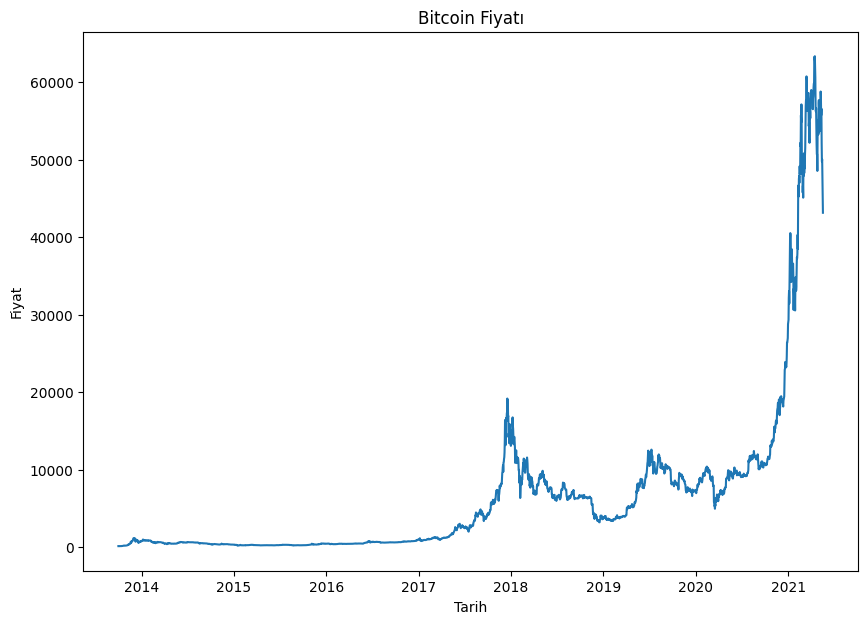

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Bitcoin Fiyatı")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.show()

Train - Test

In [ ]:
## Date dizisini alalım

btc_price[:5]

[123.65499, 125.455, 108.58483, 118.67466, 121.33866]

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(timesteps,
  #                                                  prices,
    #                                                test_size=0.2,
     #                                               random_state=42)

#len(X_train), len(X_test), len(y_train), len(y_test)

In [ ]:
#Zaman serisi için datayı bölelim (%80 train, %20 test)

split_size = int(0.8 * len(prices))

In [ ]:
#Train data (ikiye ayrılan datanın ilk kısmı)

X_train, y_train = timesteps[:split_size], prices[:split_size]

#Test data (ikinci kısmı)

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

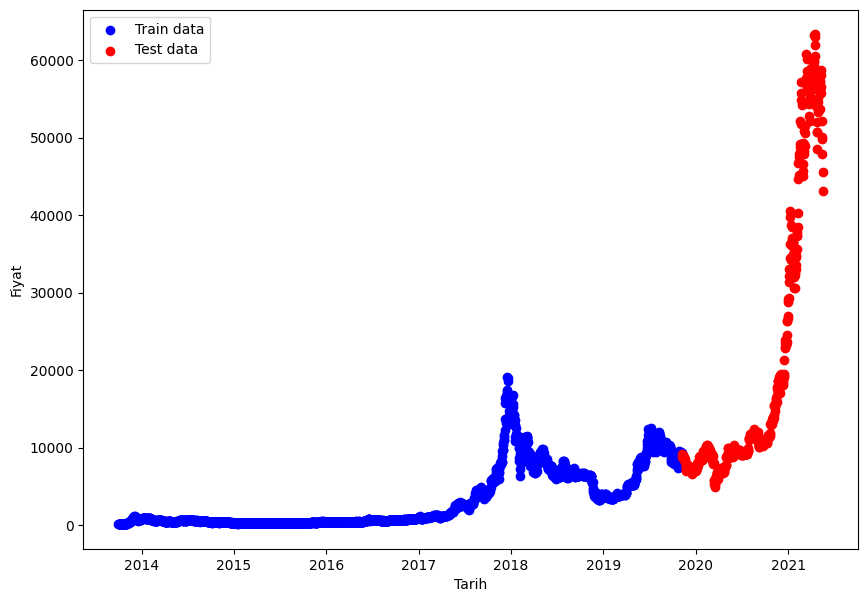

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Train data")
plt.scatter(X_test, y_test, c="r", label="Test data")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend();

In [ ]:
# Plot fonksiyonu yazalım tekrar tekrar yazmayalım

def plot_time_series(timesteps,values,format=".",start=0, end=None, label=None):
   #start mavi kısım

   plt.plot(timesteps[start:end], values[start:end], format, label=label)
   plt.xlabel("Tarih")
   plt.ylabel("Fiyat")
   if label:
     plt.legend(fontsize=14) #legend
   plt.grid(True)

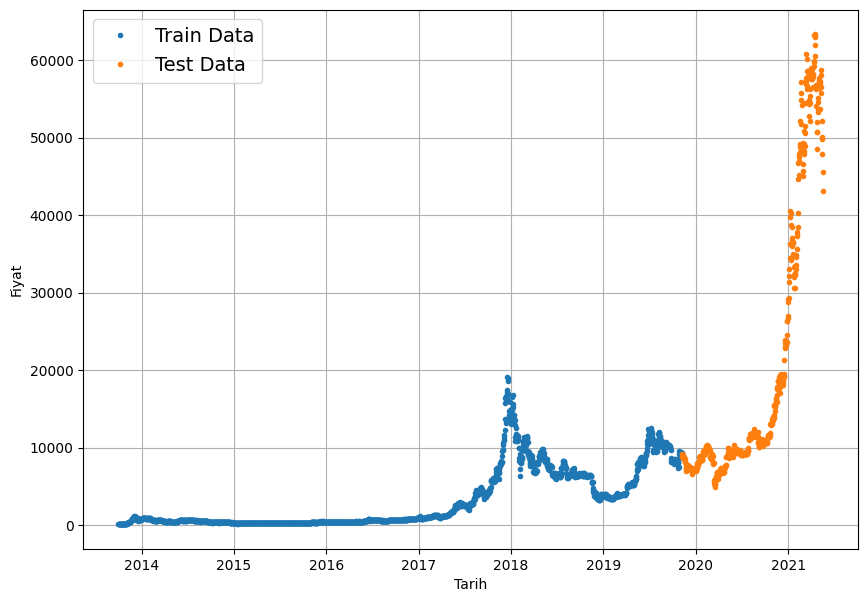

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, label="Test Data")

Modelleme ve Model Karşılaştırması


1.   Naive Model
2.   Dense Model
3.   Conv1D
4.   LSTM
5.   N-BEATS Algortihm
6.   Ensemble
7.   Future Prediction





*   Horizon : Tahmin edeceğimiz gelecekteki zaman adımlarının sayısı

*   Window Size : Tahmin için kullanacağımız zaman adımları




1. Naive Metodu





In [ ]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [ ]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

Son hücrelere bakarsak, gerçekte olan veri: 43144.47129086 ve naive yönteminin tahmini: 45604.61575361

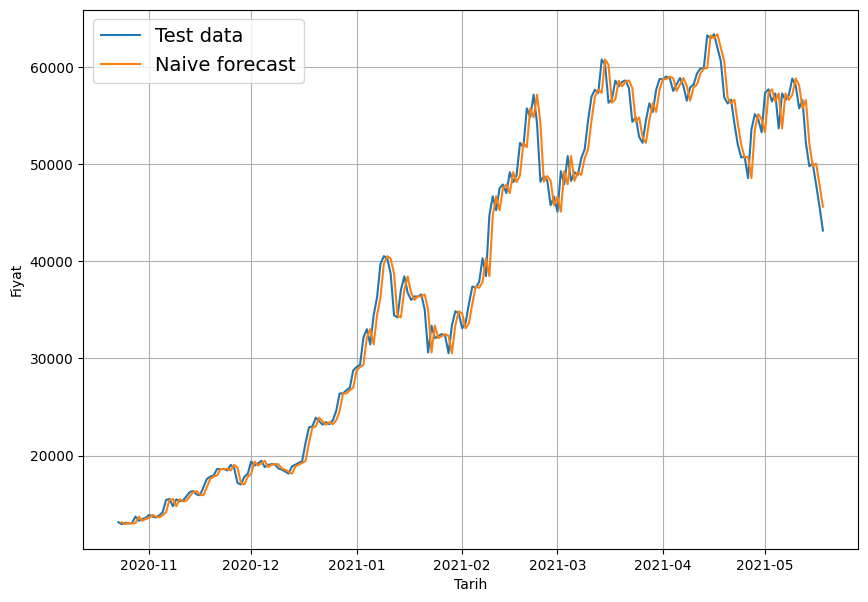

In [ ]:
plt.figure(figsize=(10,7))
#plot_time_series(timesteps=X_train, values=y_train,  label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive forecast") #ilk indexi alırsak shape error verir

Naive metodu nerdeyse aynı değerleri tahmin ediyor.

In [ ]:
import tensorflow as tf


In [ ]:
#MASE uygulaması

def mean_absolute_scaled_error(y_true,y_pred):

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  #Naive Tahmininin MAE'sini bul

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) #mevsimsellik 1 gün. 1 günde 1 veri var.

  return mae/mae_naive_no_season

  #MASE'yi hesapla

  return mae/mae_naive_no_season


In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast).numpy()

0.9995699939182624

Sonuç<1 olduğu için tahminleme naiveden daha iyi

Model tahminlerinin gerçek değerleri ve değerlendirme metriklerinin geri döndürülmesi

In [ ]:
def evaluate_preds(y_true, y_pred):
  #metrik hesaplaması için verilerin float32 tipinde olması lazım
  #y_true = tf.cast(y_true, y_pred.dtype)
  #y_pred = tf.cast(y_pred, y_pred.dtype)

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  #Metrikler

  mea = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae":mea.numpy(), "mse":mse.numpy(), "mape":mape.numpy(), "rmse":rmse.numpy(), "mase":mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'mape': 2.5165248,
 'rmse': 1071.2362,
 'mase': 0.99957}

Her zaman düşük sonucu veren daha iyidir.

In [ ]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

mae'ye göre tahmin edilen fiyatlar 567 dolar kadar fark ediyor

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [ ]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

max değer (63346) için mae değeri kabul edilebilir olsa da minimum değer için kötü bir oran.

Window : Zaman serisi problemlerimizi denetimli öğrenme problemlerine dönüştürmek için window kullanıyoruz.

In [ ]:
##Format veri 2
#[0,1,2,3,4,5] -> [6]

In [ ]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [ ]:
len(y_train)

2229

In [ ]:
btc_price[:7], btc_price[7]

([123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
 123.033)

In [ ]:
print(f"Kullanmak istediğimiz data: {btc_price[:7]} Tahmin edeceğimiz data: {btc_price[7]}")

Kullanmak istediğimiz data: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] Tahmin edeceğimiz data: 123.033


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
import numpy as np
def get_labelled_window(x, horizon=HORIZON):
  #Horizon=1 ise
  # Input = [0,1,2,3,4,5,6,7] -> Output= ([0,1,2,3,4,5,6],[7])
  return x[:, :-horizon], x[:, -horizon]

In [ ]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([7], dtype=int32)>)

In [ ]:
tf.expand_dims(tf.range(8)+1, axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [ ]:
print(f"Window: {tf.squeeze(test_window).numpy()} --> d: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] --> d: 7


In [ ]:
#Yukardaki yaptığımızı şuanki daha büyük veri için uygulamalıyız.
#Numpy array indexing
'''
[[0,1,2,3,4,5,6],
[1,2,3,4,5,6,7],
[2,3,4,5,6,7,8]]
'''
def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):
  # 2 boyutlu diziden 1 boyutlu dizi döndürecek
  # 1. window size büyüklüğünde dizinin sonuna horizon ekle
  window_step = np.expand_dims(np.arange(window_size + horizon),axis=0)

  #2. Indexing
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)),axis=0).T

  #print(print(f"Window indexes:\n {window_indexes, window_indexes.shape} "))

  #3 her bir diziyi alıp prices 'a yazacağız
  windowed_array = x[window_indexes]
  #print(f"Windowed array:\n {windowed_array, windowed_array.shape}")

  #4.Etiketlenmiş window'ları al
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)


  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices,window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
len(prices)

2787

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} --> Horizon: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> Horizon: 123.033
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> Horizon: 124.049
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> Horizon: 125.96116


In [ ]:
#Train / Test splits

def make_train_test_splits(windows, labels, test_split = 0.2):
  splits_size = int(len(windows)* (1-test_split)) #%80 train , %20 test
  train_windows = windows[:splits_size]
  train_labels = labels[:splits_size]
  test_windows = windows[splits_size:]
  test_labels = labels[splits_size:]
  return train_windows, test_windows, train_labels, test_labels




In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
len(full_windows)*0.8

2224.0

In [ ]:
train_windows[:5], test_label[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([7], dtype=int32)>)

In [ ]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [ ]:
#windowlama yapmadan önceki test_label ile şuanki test_label'ı karşılaştıralım

np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [ ]:
#ModelCheckPoint

import os

def create_model_checkpoint(model_name, save_path = "model_expriments"):
  return tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(save_path, model_name),
    verbose=0,
    save_best_only =True)



In [ ]:
#Model 1 = Dense Model (Window = 7, Horizon = 1)
# 1 output , 128 hidden unit, ReLU
#Linear Activasyon
#Adam optimizasyonu ve MAE kayıp fonksiyonu
#Batch_size = 128
#100 epochs

import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

#Modeli kur
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name = "Model_1_dense")

#Compile
model_1.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(), metrics=["mae","mse"])

#Modeli Fit Et

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])


Epoch 1/100
18/18 [==============================] - 2s 58ms/step - loss: 1047.0160 - mae: 1047.0160 - mse: 4066114.7500 - val_loss: 3125.7590 - val_mae: 3125.7593 - val_mse: 20321166.0000
Epoch 2/100
18/18 [==============================] - 1s 32ms/step - loss: 263.6397 - mae: 263.6397 - mse: 298056.9062 - val_loss: 1059.5372 - val_mae: 1059.5372 - val_mse: 3475294.5000
Epoch 3/100
18/18 [==============================] - 0s 28ms/step - loss: 161.4790 - mae: 161.4790 - mse: 129159.7422 - val_loss: 813.7012 - val_mae: 813.7012 - val_mse: 2186507.2500
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 144.6667 - mae: 144.6667 - mse: 115451.6719 - val_loss: 829.0126 - val_mae: 829.0126 - val_mse: 2168318.2500
Epoch 5/100
18/18 [==============================] - 1s 30ms/step - loss: 142.2478 - mae: 142.2478 - mse: 112570.8984 - val_loss: 784.6131 - val_mae: 784.6131 - val_mse: 2083452.1250
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 142.7

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 636.6770 - mae: 636.6770 - mse: 1297922.5000


[636.677001953125, 636.677001953125, 1297922.5]

In [ ]:
model_1 = tf.keras.models.load_model("model_expriments/Model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 560.2770 - mae: 560.2770 - mse: 1149411.7500


[560.2769775390625, 560.2769775390625, 1149411.75]

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'mape': 2.5165248,
 'rmse': 1071.2362,
 'mase': 0.99957}

In [ ]:
#Test data üzerinde model ile tahminleme yapalım



1. Eğitilmiş modeli al
2. Input data al
3. Input'ları predict() modeline sok
4. Tahmini geri döndür

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) #1D boyutlu dizi döndür

In [ ]:
#Model_1'i kullanarak tahmin yap.

model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8850.644, 8785.311, 9032.709, 8789.627, 8765.766, 8739.482,
        8675.201, 8539.489, 8461.625, 8531.536], dtype=float32)>)

In [ ]:
test_labels[:10]

array([8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
       8749.52059102, 8656.97092235, 8500.64355816, 8469.2608989 ,
       8537.33965197, 8205.80636599])

In [ ]:
test_labels.shape, model_1_preds.shape

((556,), TensorShape([556]))

In [ ]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([556]), TensorShape([556]))

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 560.277,
 'mse': 1149412.0,
 'mape': 2.507773,
 'rmse': 1072.1063,
 'mase': 0.98425144}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'mape': 2.5165248,
 'rmse': 1071.2362,
 'mase': 0.99957}

ValueError: x and y must have same first dimension, but have shapes (102,) and (106,)

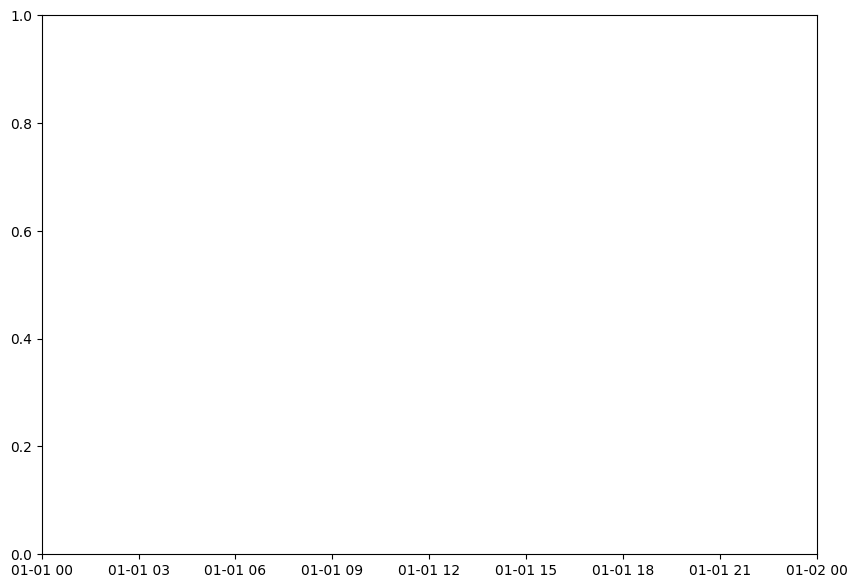

In [ ]:
offset = 450
plt.figure(figsize=(10, 7))


plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")


plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:],
                 start=offset,
                 format="-",
                 label="Test Data")

Kaymaların olmasının sebebi bunun aslında tahmin sonuçları değil test data olmasıdır.

Model 2 : Dense (window030, horizon=1)

In [ ]:
HORIZON = 1 # bir zamanda 1 adımı tahmin et.
WINDOW_SIZE = 30 # geçmişteki 30 adım

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
#Train, test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
#Modeli kuralım

model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

#compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
#fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 615.6617


615.6616821289062

In [ ]:
#en iyi modeli kaydet

model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

OSError: No file or directory found at model_experiments/model_2_dense/

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 1ms/step


In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 615.6617,
 'mse': 1313224.6,
 'mape': 2.8112876,
 'rmse': 1145.9601,
 'mase': 1.0761826}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'mape': 2.5165248,
 'rmse': 1071.2362,
 'mase': 0.99957}

Naive modelden daha iyi çalışmıyor model2.
O zaman daha küçük window size daha iyi sonuçlar çıkarıyor.

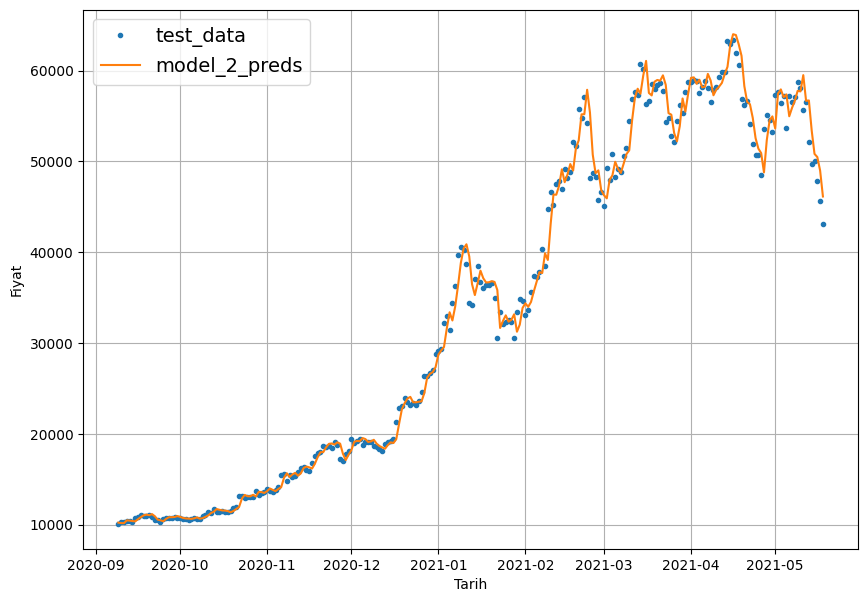

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

Model 3: Dense(window=30, horizon=7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

#Modeli kur
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 662.1677


662.167724609375

In [ ]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

OSError: No file or directory found at model_experiments/model_3_dense/

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9193.701 , 9274.117 , 9339.719 , 9314.955 , 9185.853 , 9255.673 ,
        9336.407 ],
       [8898.041 , 9014.406 , 8885.43  , 8903.328 , 8777.878 , 8931.418 ,
        8962.172 ],
       [8565.555 , 8802.906 , 8668.211 , 8691.077 , 8676.0205, 8630.688 ,
        8731.253 ],
       [8641.871 , 8607.523 , 8772.578 , 8650.675 , 8844.191 , 8814.906 ,
        8738.919 ],
       [8551.171 , 8461.041 , 8544.111 , 8542.659 , 8635.736 , 8724.236 ,
        8543.197 ]], dtype=float32)>

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

InvalidArgumentError: {{function_node __wrapped__Sub_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [551,7] vs. [551] [Op:Sub] name: 

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

InvalidArgumentError: {{function_node __wrapped__Sub_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [551,7] vs. [551] [Op:Sub] name: 

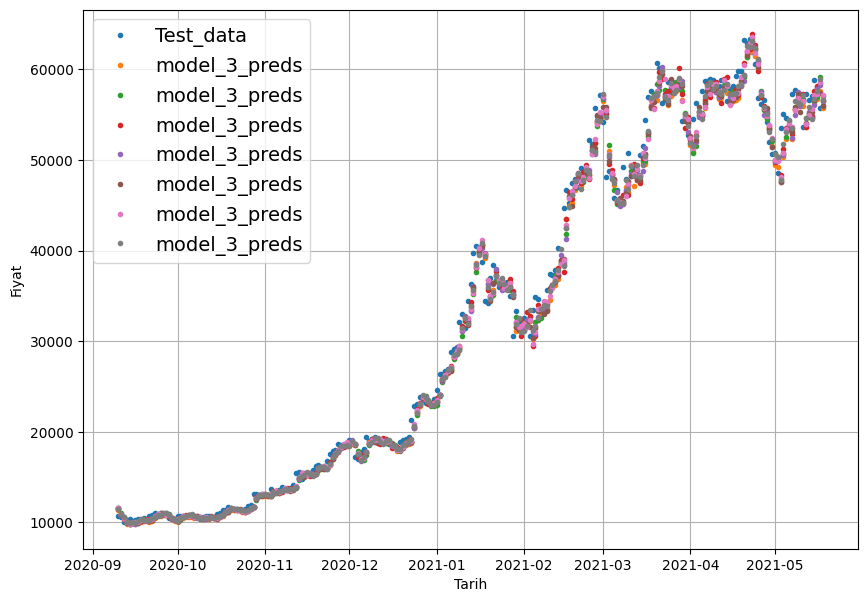

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, ], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

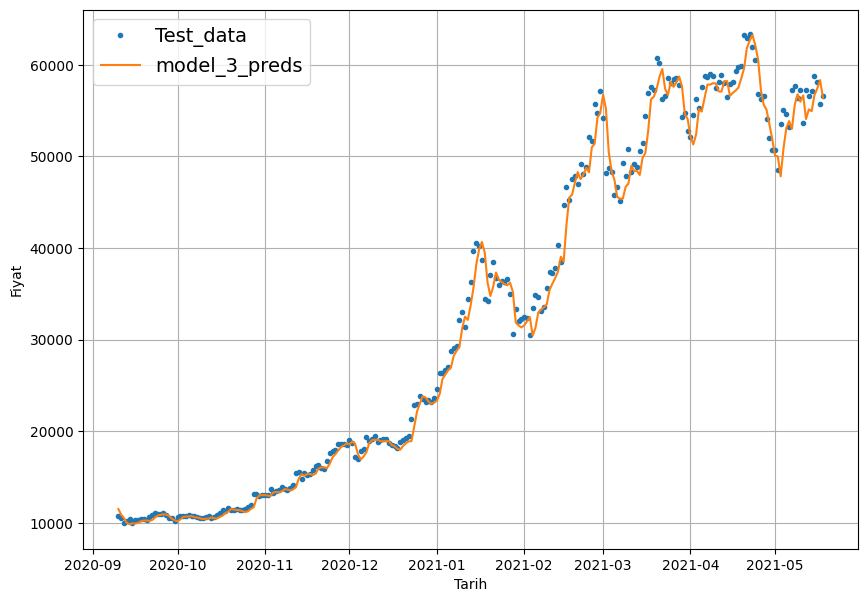

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, ],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

Modelleri Karşılaştıralım

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

NameError: name 'model_3_results' is not defined

Horizon=1 ve window=7, Naive metodunun sonuçlarına en yakın olan model oldu.

Model 4: Conv1D

In [ ]:
HORIZON = 1 # bir sonraki günü tahmin et
WINDOW_SIZE = 7 # geçen haftanın verilerini al

In [ ]:
# window veri seti oluştur
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:

train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [ ]:

x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

# model oluştur
model_4 = tf.keras.Sequential([

  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_22 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

OSError: No file or directory found at model_experiments/model_4_conv1D

In [ ]:
# Tahminleme
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1088.1498, 1064.7369, 1082.2881, 1076.797 , 1097.7327, 1053.3008,
       1085.4916, 1060.4794, 1026.1569, 1051.4501], dtype=float32)>

In [ ]:
# Tahminleri değerlendir
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 17660.182,
 'mse': 549840100.0,
 'rmse': 23448.67,
 'mape': 87.781075,
 'mase': 31.024048}

Model 5 : RNN (LSTM)

In [ ]:
tf.random.set_seed(42)


inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# print(x.shape)

# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

OSError: No file or directory found at model_experiments/model_5_lstm/

In [ ]:
#Tahminleme
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8894.124, 8784.883, 8927.623, 8756.601, 8736.67 , 8681.708,
       8654.009, 8539.08 , 8422.837, 8482.017], dtype=float32)>

In [ ]:
#Tahminleri değerlendir
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 589.59735,
 'mse': 1231417.5,
 'rmse': 1109.6925,
 'mape': 2.645105,
 'mase': 1.0357592}

Görünüşe göre model4 ve model5 naive modelini geçemedi.

Çok Değişkenli Zaman Serisi

In [ ]:
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - bu block reward veri setinde yazmıyor
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward tarihleri
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [ ]:
#  block_reward kolonu ekle
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# verileri sütuna gir
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


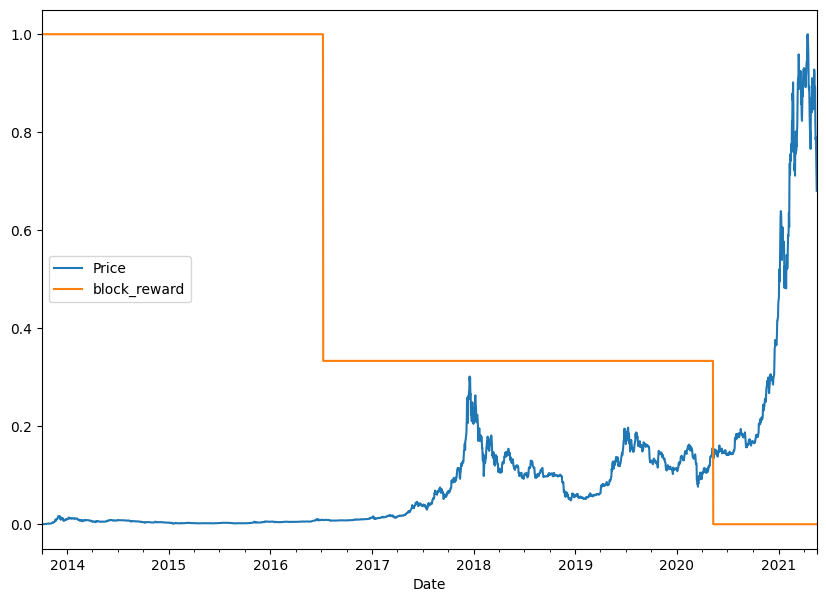

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

Block reward price aşağı indikçe bitcoin fiyatı artıyor. Modellerimizin daha iyi sonuç bulmasına yardım edebilir.

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
#datayı kopyala
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# window kolonlarını ekle
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500





*   [0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
*   [1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]




In [ ]:
#NaN değerleri kaldıralım
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()


,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
#Train/Test

split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

Model 6 : Dense (Çokdeğişkenli Zaman Serileri)

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

OSError: No file or directory found at model_experiments/model_6_dense_multivariate

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8684.706, 8626.504, 8889.733, 8623.074, 8578.518, 8577.172,
       8539.879, 8358.119, 8307.24 , 8385.373], dtype=float32)>

In [ ]:
#Tahminler
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 652.13873,
 'mse': 1326599.5,
 'rmse': 1151.781,
 'mape': 3.0126305,
 'mase': 1.1456271}

In [ ]:
model_1_results

{'mae': 560.277,
 'mse': 1149412.0,
 'mape': 2.507773,
 'rmse': 1072.1063,
 'mase': 0.98425144}

Sonuçlar biraz daha iyiye gitse de model_1'in tahmin sonuçlarına yaklaşamadı.

Model 7 : N_BEATS Algoritması

Sonuçları geliştirmek için katmanların sayısını arttırmak bir yöntem olabilir. N_BEATS algoritması bu şekilde çalışıyor.

N-Beats Block Layer

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
#girdi ve çıktıları temsil etmek için geçici bir layer oluşturalım
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
#Geçici input oluşturalım
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Geçiçi girdileri geçici layer'a verelim
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.00696121 -1.403137   -0.73373234 -0.76932037 -0.49962476 -0.3999527
  0.8221778 ]
Forecast: -0.4775611460208893


In [ ]:
#Algoritma içn veriyi hazırlayalım

HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

#  train-test
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
#  tensor oluştur
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Çıkar
subtracted = layers.subtract([tensor_1, tensor_2])

# Ekle
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
%%time

tf.random.set_seed(42)

# 1.  N-BEATS Block katmanlarını oluştur
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Yığınlara girdileri koy
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. İlk tahminleri oluştur
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Blokları oluştur
for i, _ in enumerate(range(N_STACKS-1)):

  # 5. NBeatsBlock kullanarak geriye dönük tahminleri hesapla
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  # 6. Geriye dönük tahmin katmanlarını çıkar, gelecek tahmin katmanlarını ekle
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Modeli birleştir
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8.  MAE loss ve Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)]
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 280: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 380: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1h 8min 18s, sys: 48.9 s, total: 1h 9min 7s
Wall time: 54min 37s


In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 1s 1s/step - loss: 576.3468 - mae: 576.3468 - mse: 1156326.8750


[576.3468017578125, 576.3468017578125, 1156326.875]

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 4s 4s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8858.115, 8825.803, 9060.957, 8788.158, 8818.701, 8812.442,
       8663.287, 8522.552, 8486.236, 8531.885], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 576.3468,
 'mse': 1156326.9,
 'rmse': 1075.3264,
 'mape': 2.6513333,
 'mase': 1.0124817}

1 saatlik bir runtimedan sonra bile, Naive Model kadar iyi bir sonuç çıkaramadı

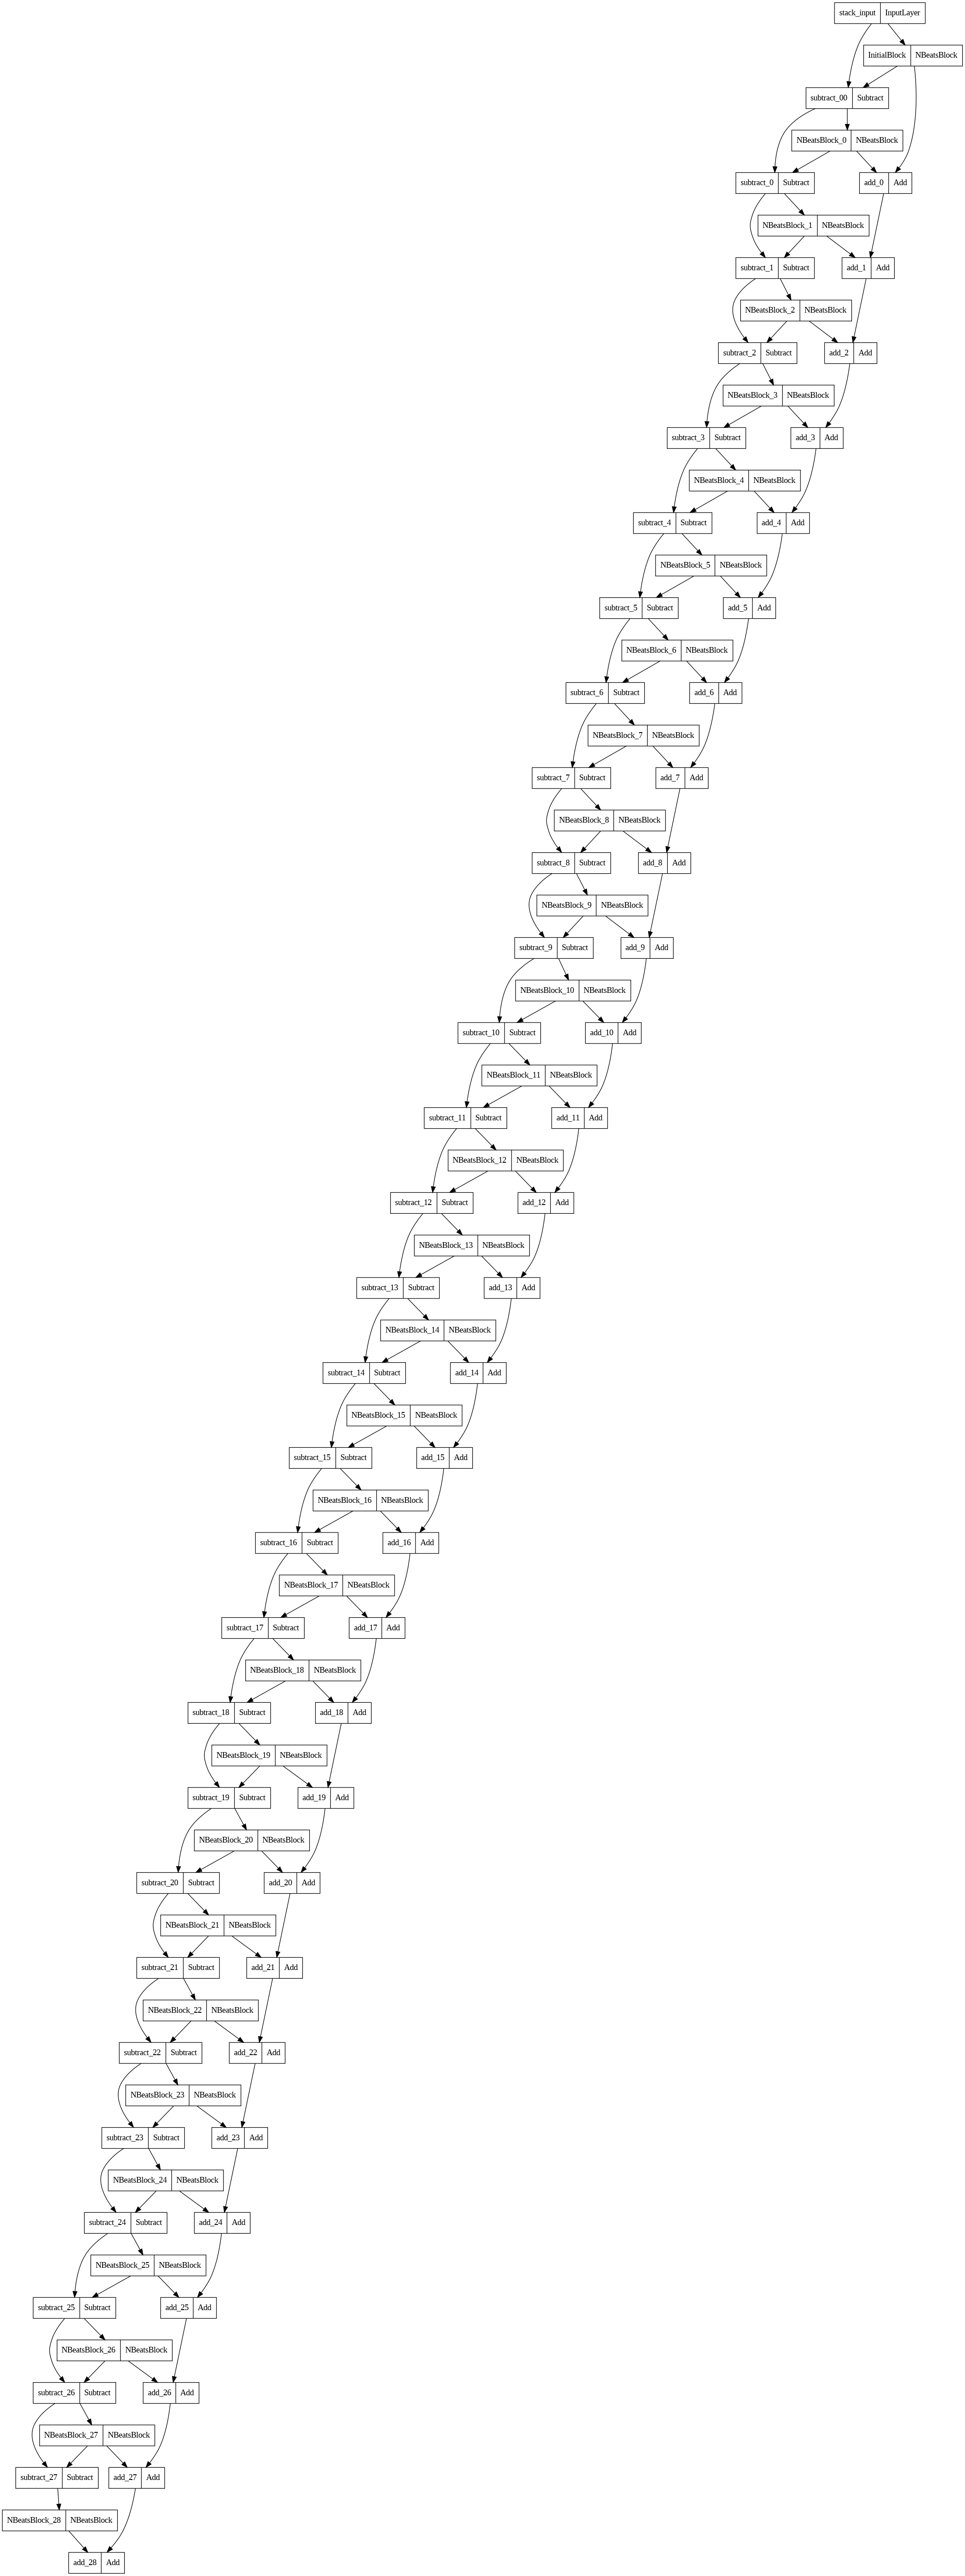

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [ ]:
#Modelleri birleştirelim

def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):


  # boş liste
  ensemble_models = []


  for i in range(num_iter):

    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")


      model = tf.keras.Sequential([

        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])


      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,

                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])


      ensemble_models.append(model)

  return ensemble_models # eğitilmiş modelleri döndür


In [ ]:
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 495: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 863: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 963: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 286: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 386: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 786: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 886: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 265: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 365: ReduceLROnPl

Ensemble Modeli ile Tahminleme

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 71ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8815.102,  8811.15 ,  9018.172, ..., 50220.164, 48313.125,
        46344.492],
       [ 8756.893,  8736.327,  9110.646, ..., 49749.38 , 48196.824,
        45770.715],
       [ 8797.686,  8785.944,  9017.159, ..., 49098.727, 48185.   ,
        45524.63 ],
       ...,
       [ 8754.965,  8791.03 ,  9066.406, ..., 49546.652, 48485.8  ,
        46584.805],
       [ 8762.735,  8763.544,  9182.532, ..., 49832.914, 48365.605,
        46034.46 ],
       [ 8806.386,  8812.743,  9098.284, ..., 50107.04 , 48151.76 ,
        45436.566]], dtype=float32)>

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 569.4507,
 'mse': 1153541.2,
 'rmse': 1074.0304,
 'mape': 2.5595822,
 'mase': 1.0003672}

Kullandığımız modelelrden en iyi sonucu bu model verdi

In [ ]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis=0)


  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96


  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper


lower, upper = get_upper_lower(preds=ensemble_preds)

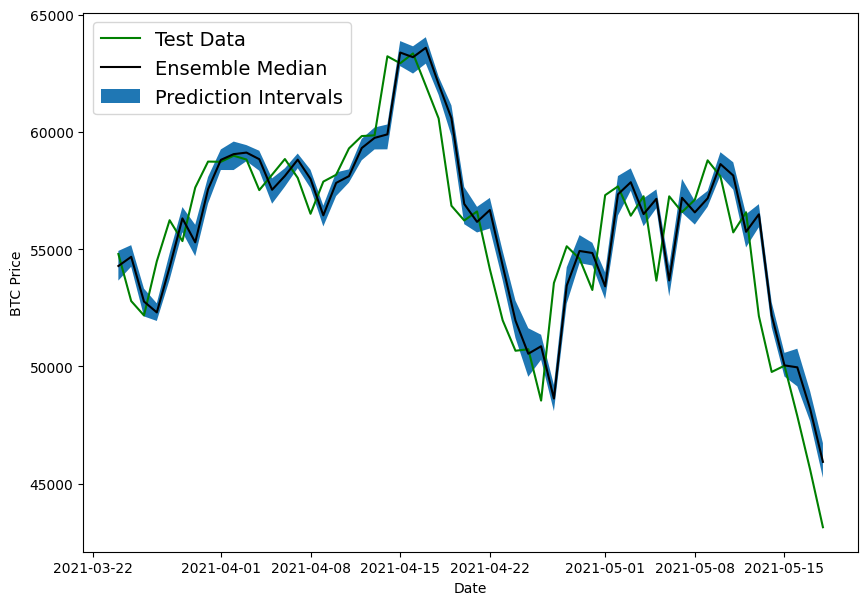

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)


offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Model 9 : Geçmiş verilerle geleceği tahmin etme

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# Create model
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())


model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

In [ ]:
INTO_FUTURE = 14

In [ ]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:


  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(into_future):


    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")


    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)


    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 96ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55927.1875

1/1 [==============================] - 0s 80ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55927.1875    ] -> Prediction: 49735.1953125

1/1 [==============================] - 0s 40ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55927.1875     49735.1953125 ] -> Prediction: 50066.09765625

1/1 [==============================] - 0s 84ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55927.1875     49735.1953125  50066.09765625] -> Prediction: 48063.86328125

1/1 [==============================] - 0s 70ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55927.1875
 49735.1953125  50066.09765625 48063.86328125] 

In [ ]:
future_forecast[:10]

[55927.188,
 49735.195,
 50066.098,
 48063.863,
 48790.01,
 44748.676,
 50249.938,
 52887.33,
 49761.207,
 48763.19]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):

  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55927.188, 49735.195, 50066.098, 48063.863, 48790.01 ,
        44748.676, 50249.938, 52887.33 , 49761.207, 48763.19 , 49024.8  ,
        47932.836, 47807.38 , 51894.426], dtype=float32))

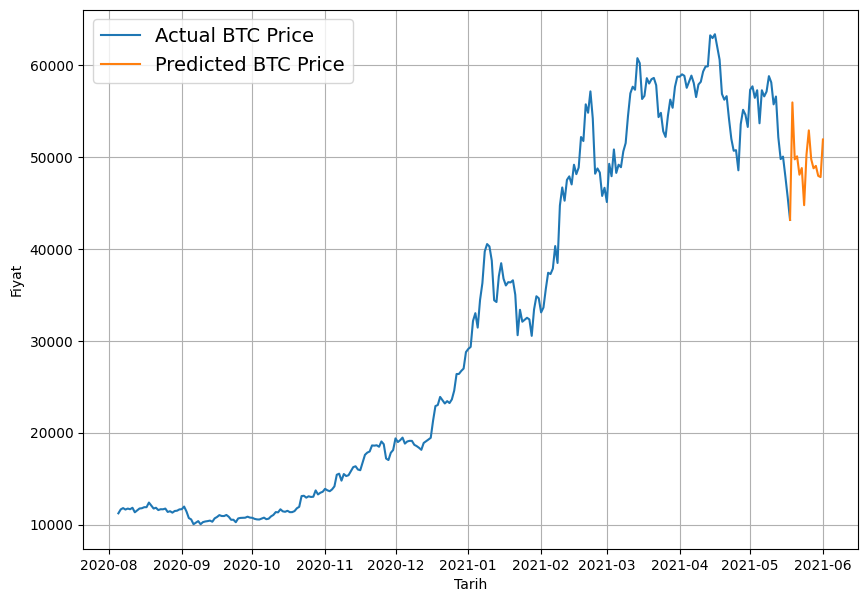

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")
